In [2]:
#task1 
#implement perceptron training algorithm

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score

In [3]:
#load the data set
iris=load_iris()
x=iris.data;
Y=iris.target

In [5]:
#split the data into training and testing data
X_train,X_test,y_train,y_test=train_test_split(x,Y,test_size=0.3,random_state=1)

#Standard Scaler
sc=StandardScaler()
X_train_std=sc.fit_transform(X_train)
X_test_std=sc.transform(X_test)

In [7]:
#train the perceptron model
ppn=Perceptron(max_iter=40,eta0=0.1,random_state=1)

In [9]:
ppn.fit(X_train_std,y_train)

Perceptron(eta0=0.1, max_iter=40, random_state=1)

In [10]:
#predict the test set results
y_pred=ppn.predict(X_test_std)

In [11]:
#evaluate the accuracy
print(f'Accuracy :{accuracy_score(y_test,y_pred)}')

Accuracy :0.8666666666666667


In [13]:
#Task 2

#Implement Activation functions in Neural Networks and analyze their usage 

In [14]:
import numpy as np
import matplotlib.pyplot as plt

In [15]:
#Sigmoid function

def sigmoid(x):
    return 1/(1+np.exp(-x))

#tanh function

def tanh(x):
    return np.tanh(x)

#RelU function

def relu(x):
    return np.maximum(0,x)

#leakyRelU function

def leaky_relu(x,alpha=0.01):
    return np.maximum(x,x*alpha)


    

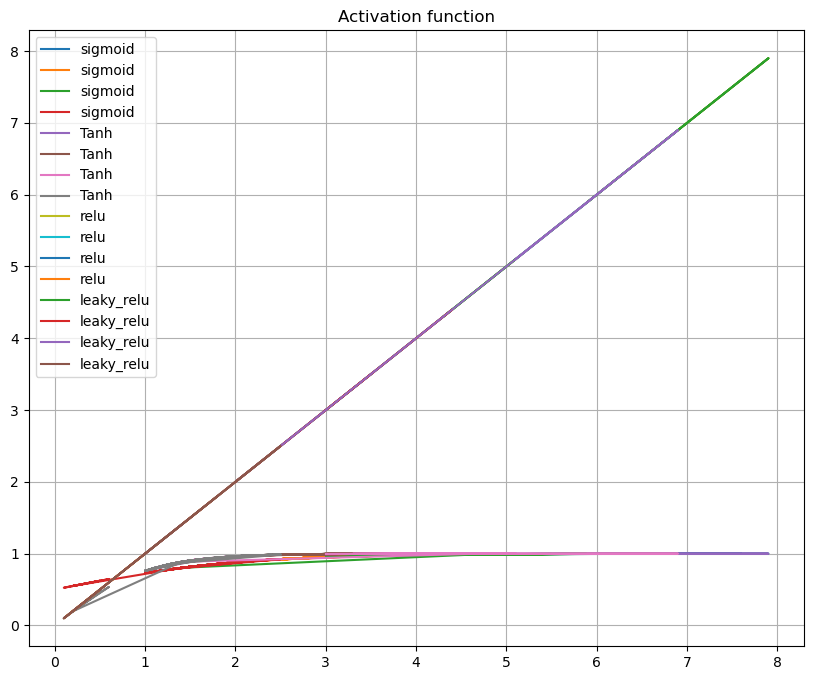

In [16]:
#plotting the activation functions

plt.figure(figsize=(10,8))
plt.plot(x,sigmoid(x),label='sigmoid')
plt.plot(x,tanh(x),label='Tanh')
plt.plot(x,relu(x),label='relu')
plt.plot(x,leaky_relu(x),label='leaky_relu')
plt.title('Activation function')
plt.legend()
plt.grid(True)
plt.show()

In [17]:
#Task3 
#build a three layer artifical Network by implementing the back propagation algorithm

In [25]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential

In [26]:
#Generate a binary classification dataset

X,y=make_classification(n_samples=1000,n_features=20,n_classes=2,random_state=1)


#split the dataset into training and testing data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

sc=StandardScaler()
X_train=sc.fit_transform(X_train)
x_test=sc.transform(X_test)

In [27]:
#Build the model network model

model=Sequential([
    Dense(64,input_dim=20,activation='relu'),
    Dense(64,activation='relu'),
    Dense(1,activation='sigmoid')
])

C:\Users\DELL\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [30]:
#compile the model

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [31]:
#Train the model

model.fit(X_train,y_train,epochs=100,batch_size=10,verbose=1)

Epoch 1/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6350 - loss: 0.6405
Epoch 2/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8325 - loss: 0.4220
Epoch 3/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8287 - loss: 0.3738
Epoch 4/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8901 - loss: 0.2932
Epoch 5/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8774 - loss: 0.2948
Epoch 6/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8803 - loss: 0.2956
Epoch 7/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8903 - loss: 0.2860
Epoch 8/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8925 - loss: 0.2798
Epoch 9/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9037 - loss: 0.2484
Epoch 10/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9118 - loss: 0.2615
Epoch 11/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9280 - loss: 0.2122
Epoch 12/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy:

In [35]:
#evalute the model

loss,accuracy=model.evaluate(X_test,y_test,verbose=0)

print(f'Test Accuracy = {accuracy}')

Test Accuracy = 0.8500000238418579


In [39]:
#task 4
#GRU based deep learning model for IMDB model

import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GRU, LSTM, Dense


In [49]:
#load the imdb dataset

max_features=1000
max_len=100

(x_train,y_train),(x_test,y_test)=imdb.load_data(num_words=max_features)

In [50]:
#pad the sequences to ensure uniform length
x_train = pad_sequences(x_train, maxlen=max_len)
x_test = pad_sequences(x_test,maxlen=max_len)

In [51]:
#Build the GRU Model

gru_model=Sequential([
    Embedding(max_features,128,input_length=max_len),
    GRU(128,return_sequences=True),
    GRU(128),
    Dense(1,activation='sigmoid')
])

In [52]:
#compile the model

gru_model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [53]:
#train the GRU Model
# Train the GRU Model
gru_model.fit(x_train, y_train, epochs=2, batch_size=32,validation_split=0.2)





Epoch 1/2
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 126ms/step - accuracy: 0.6680 - loss: 0.5792 - val_accuracy: 0.8160 - val_loss: 0.4175
Epoch 2/2
625/625 ━━━━━━━━━━━━━━━━━━━━ 68s 109ms/step - accuracy: 0.8365 - loss: 0.3790 - val_accuracy: 0.8292 - val_loss: 0.3787


In [53]:
#evaluate the GRU Model

gru_loss,gru_accuracy=gru_model.evaluate(x_test,y_test)

In [54]:
#Task 5

#Deep Neural Network for multi-class text classification


In [78]:
from tensorflow.keras.datasets import reuters
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical

# Load the Reuters dataset
max_words = 10000  # Limit to the top 10,000 words

(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=max_words)

# Tokenize and prepare the data

# Initialize the Tokenizer
tokenizer = Tokenizer(num_words=max_words)

# Convert the sequences into a binary matrix representation
x_train = tokenizer.sequences_to_matrix(x_train, mode='binary')
x_test = tokenizer.sequences_to_matrix(x_test, mode='binary')

# Convert labels to categorical format
y_train = to_categorical(y_train, num_classes=46)  # 46 categories in Reuters dataset
y_test = to_categorical(y_test, num_classes=46)

# Build the model
model = Sequential([
    Dense(512, input_shape=(max_words,), activation='relu'),  # Input layer, 10,000 features
    Dropout(0.5),  # Regularization
    Dense(512, activation='relu'),  # Hidden layer
    Dropout(0.5),  # Regularization
    Dense(46, activation='softmax')  # Output layer, 46 categories
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=5, batch_size=32, validation_split=0.2)


Epoch 1/5
225/225 ━━━━━━━━━━━━━━━━━━━━ 20s 76ms/step - accuracy: 0.5724 - loss: 1.9169 - val_accuracy: 0.7529 - val_loss: 1.0808
Epoch 2/5
225/225 ━━━━━━━━━━━━━━━━━━━━ 17s 77ms/step - accuracy: 0.7976 - loss: 0.8522 - val_accuracy: 0.7986 - val_loss: 0.9148
Epoch 3/5
225/225 ━━━━━━━━━━━━━━━━━━━━ 16s 72ms/step - accuracy: 0.8786 - loss: 0.5148 - val_accuracy: 0.8080 - val_loss: 0.9225
Epoch 4/5
225/225 ━━━━━━━━━━━━━━━━━━━━ 16s 70ms/step - accuracy: 0.9164 - loss: 0.3438 - val_accuracy: 0.8091 - val_loss: 0.9581
Epoch 5/5
225/225 ━━━━━━━━━━━━━━━━━━━━ 17s 76ms/step - accuracy: 0.9334 - loss: 0.2835 - val_accuracy: 0.8069 - val_loss: 0.9896


In [79]:
# Evaluate the model on the test data
score = model.evaluate(x_test, y_test, batch_size=32)

# Print the test accuracy
print(f'Test accuracy: {score[1]}')


71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8165 - loss: 1.0341
Test accuracy: 0.8089937567710876


In [80]:
#Task 6

In [81]:
#model for MNIST hand written digit classifcation

In [85]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout

from tensorflow.keras.utils import to_categorical

In [86]:
#load the mnist data set

(x_train,y_train),(x_test,y_test)=mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [90]:
#reshape the normalize of the data

x_train=x_train.reshape(x_train.shape[0],28,28,1).astype('float32')/255


In [91]:

x_test=x_test.reshape(x_test.shape[0],28,28,1).astype('float32')/255

In [92]:
#Convert the labels into ctegorical format

y_train=to_categorical(y_train,10)
y_test=to_categorical(y_test,10)

In [95]:
#Build the CNN Model

model=Sequential([
    Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(28,28,1)),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(64,kernel_size=(3,3),activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(128,activation='relu'),
    Dropout(0.5),
    Dense(10,activation='softmax')
])

In [98]:
#Compile the model

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])


In [99]:
#Train the model

model.fit(x_train,y_train,epochs=10,batch_size=128,validation_split=0.2)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 14s 25ms/step - accuracy: 0.7819 - loss: 0.7001 - val_accuracy: 0.9759 - val_loss: 0.0822
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - accuracy: 0.9643 - loss: 0.1186 - val_accuracy: 0.9838 - val_loss: 0.0543
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - accuracy: 0.9757 - loss: 0.0816 - val_accuracy: 0.9872 - val_loss: 0.0464
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - accuracy: 0.9807 - loss: 0.0632 - val_accuracy: 0.9875 - val_loss: 0.0427
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step - accuracy: 0.9839 - loss: 0.0528 - val_accuracy: 0.9868 - val_loss: 0.0451
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 25ms/step - accuracy: 0.9854 - loss: 0.0472 - val_accuracy: 0.9894 - val_loss: 0.0382
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step - accuracy: 0.9869 - loss: 0.0404 - val_accuracy: 0.9898 - val_loss: 0.0348
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step - accuracy: 0.9905 - loss: 0.0320 - val_

In [101]:
#evaluate the model

test_loss,test_acc=model.evaluate(x_test,y_test)
print(f'Test Accuracy : {test_acc}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9878 - loss: 0.0297
Test Accuracy : 0.9902999997138977


In [104]:
#task 7

#train a simple reccurent neural network using Embedding layer ans a simple RNN layer

In [115]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Load the IMDB dataset
max_features = 10000
maxlen = 500
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

# Pad sequences to ensure uniform length
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

# Build the model
model = Sequential([
    Embedding(max_features, 128, input_length=maxlen),
    SimpleRNN(128),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test Accuracy: {test_acc}')


Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 68s 105ms/step - accuracy: 0.5897 - loss: 0.6495 - val_accuracy: 0.7670 - val_loss: 0.4900
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 70s 112ms/step - accuracy: 0.7890 - loss: 0.4652 - val_accuracy: 0.7738 - val_loss: 0.4938
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 67s 107ms/step - accuracy: 0.8131 - loss: 0.4333 - val_accuracy: 0.7946 - val_loss: 0.4731
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 70s 113ms/step - accuracy: 0.7962 - loss: 0.4204 - val_accuracy: 0.6198 - val_loss: 0.6444
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 72s 115ms/step - accuracy: 0.7226 - loss: 0.5461 - val_accuracy: 0.7422 - val_loss: 0.5478
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 71s 113ms/step - accuracy: 0.8199 - loss: 0.4142 - val_accuracy: 0.7354 - val_loss: 0.5620
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 70s 113ms/step - accuracy: 0.8565 - loss: 0.3522 - val_accuracy: 0.7564 - val_loss: 0.5507
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 73s 117ms/step - accuracy: 0.8734 - loss: 0

In [116]:
#task 8
#BUILD a deep learning model using LSTM layer in keras for imdb datasets

In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding,LSTM,Dense
from tensorflow.keras.datasets import imdb

#load the imdb dataset

max_features=10000
maxlen=500

(x_train,y_train),(x_test,y_test)=imdb.load_data(num_words=max_features)

#pad the sequences to ensure uniform length

x_train=pad_sequences(x_train,maxlen=maxlen)
x_test=pad_sequences(x_test,maxlen=maxlen)

#build the model

model=Sequential([
    Embedding(max_features,128,input_length=maxlen),
    LSTM(128),
    Dense(1,activation='sigmoid')
])

#compile the model

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

#train the model

model.fit(x_train,y_train,epochs=10,batch_size=32,validation_split=0.2)

#evalauate the model

test_loss,test_acc=model.evaluate(x_test,y_test)

print(f'Test aAccuracy :{test_acc}')

C:\Users\DELL\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 210s 331ms/step - accuracy: 0.6976 - loss: 0.5593 - val_accuracy: 0.8372 - val_loss: 0.3806
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 196s 313ms/step - accuracy: 0.8647 - loss: 0.3249 - val_accuracy: 0.8390 - val_loss: 0.3657
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 207s 331ms/step - accuracy: 0.9162 - loss: 0.2269 - val_accuracy: 0.8458 - val_loss: 0.3479
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 198s 317ms/step - accuracy: 0.9473 - loss: 0.1503 - val_accuracy: 0.8580 - val_loss: 0.3816
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 193s 309ms/step - accuracy: 0.9611 - loss: 0.1100 - val_accuracy: 0.8748 - val_loss: 0.4180
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 200s 321ms/step - accuracy: 0.9612 - loss: 0.1100 - val_accuracy: 0.8648 - val_loss: 0.4557
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 189s 303ms/step - accuracy: 0.9815 - loss: 0.0587 - val_accuracy: 0.8550 - val_loss: 0.5414
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 218s 349ms/step - accuracy: 0.9891 -

In [3]:
#task 9
#desing a neural network with various optimization algorithms


import tensorflow as tf
from tensorflow.keras.layers import Dense
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


#Generate a binary classification dataset
X,y=make_classification(n_samples=1000,n_features=20,n_classes=2,random_state=1)

In [5]:
#split the data into training and testing data

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

In [7]:
#standardize the features

sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [8]:
#Build the neural network model

model=Sequential([
    Dense(64,input_dim=20,activation='relu'),
    Dense(64,activation='relu'),
    Dense(1,activation='sigmoid')
])

C:\Users\DELL\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
#compile the model with different optimizers

optimizers=['sgd','adam','rmsprop']

for opt in optimizers:
    print(f'Training with {opt} optimizers')
    model.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])
    model.fit(X_train,y_train,epochs=5,batch_size=10,verbose=0)
    loss,accuracy=model.evaluate(X_test,y_test,verbose=0)
    print(f'Test Acuracy with {opt} :{accuracy}')

Training with sgd optimizers
Test Acuracy with sgd :0.8266666531562805
Training with adam optimizers
Test Acuracy with adam :0.8366666436195374
Training with rmsprop optimizers
Test Acuracy with rmsprop :0.8533333539962769


In [ ]:
#task 10

#design a deep learning model to classify the module reviews as positive or negative based on the text content of reviews using IMDB

In [11]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding,LSTM,Dense

In [13]:
#load the imdb dataset

max_features=10000
maxlen=500

(x_train,y_train),(x_test,y_test)=imdb.load_data(num_words=max_features)

In [15]:
#Pad Seqeunces to ensure uniform length

x_train=pad_sequences(x_train,maxlen=maxlen)
x_test=pad_sequences(x_test,maxlen=maxlen)

In [16]:
#Build the lstm model

model=Sequential([
    Embedding(max_features,128,input_length=maxlen),
    LSTM(128),
    Dense(1,activation='sigmoid')
])

C:\Users\DELL\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [18]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [19]:
#Train the model

model.fit(x_train,y_train,epochs=3,batch_size=32,validation_split=0.2)

Epoch 1/3
625/625 ━━━━━━━━━━━━━━━━━━━━ 223s 353ms/step - accuracy: 0.6865 - loss: 0.5701 - val_accuracy: 0.8342 - val_loss: 0.4085
Epoch 2/3
625/625 ━━━━━━━━━━━━━━━━━━━━ 346s 554ms/step - accuracy: 0.8898 - loss: 0.2812 - val_accuracy: 0.8222 - val_loss: 0.4296
Epoch 3/3
625/625 ━━━━━━━━━━━━━━━━━━━━ 198s 317ms/step - accuracy: 0.9174 - loss: 0.2177 - val_accuracy: 0.8520 - val_loss: 0.3690


In [20]:
#evalute the model

test_loss,test_acc=model.evaluate(x_test,y_test)

print(f'Test Accuracy : {test_acc}')

782/782 ━━━━━━━━━━━━━━━━━━━━ 98s 125ms/step - accuracy: 0.8523 - loss: 0.3700
Test Accuracy : 0.8518800139427185


In [21]:
#Task11

#Apply one hot encoding technique

In [25]:
import numpy as np
from sklearn.preprocessing import OneHotEncoder

In [26]:
#exmples categorical data

categories=np.array(['apple','banana','orange','apple']).reshape(-1,1)


In [27]:
#apply one hot encoding 

encoder=OneHotEncoder(sparse=False)
one_hot_encoded=encoder.fit_transform(categories)

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [28]:
print('Original Categories;\n',categories.flatten())
print('One-Hot Encoded:\n',one_hot_encoded)

Original Categories;
 ['apple' 'banana' 'orange' 'apple']
One-Hot Encoded:
 [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]]


In [32]:
#task 12
#deep learning framework for object detection

import cv2
from matplotlib import pyplot as plt
import urllib.request

In [30]:
pip install opencv-python


  Obtaining dependency information for opencv-python from https://files.pythonhosted.org/packages/ec/6c/fab8113424af5049f85717e8e527ca3773299a3c6b02506e66436e19874f/opencv_python-4.10.0.84-cp37-abi3-win_amd64.whl.metadata
   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
   ---------------------------------------- 0.1/38.8 MB 2.8 MB/s eta 0:00:14
    --------------------------------------- 0.8/38.8 MB 8.2 MB/s eta 0:00:05
   - -------------------------------------- 1.3/38.8 MB 9.3 MB/s eta 0:00:05
   - -------------------------------------- 1.9/38.8 MB 10.1 MB/s eta 0:00:04
   -- ------------------------------------- 2.5/38.8 MB 10.6 MB/s eta 0:00:04
   --- ------------------------------------ 3.1/38.8 MB 11.0 MB/s eta 0:00:04
   --- ------------------------------------ 3.7/38.8 MB 11.3 MB/s eta 0:00:04
   ---- ----------------------------------- 4.4/38.8 MB 11.7 MB/s eta 0:00:03
   ----- ---------------------------------- 5.0/38.8 MB 11.8 MB/s eta 0:00:03
   ----- 

In [33]:
img=cv2.imread(r"C:\Users\DELL\Desktop\sign.jpg")

In [36]:
#openCV opens images as RGB
#but we want it as RGB we'll 
#also need a grayscale version
# Convert to grayscale
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Convert to RGB (optional)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)




In [37]:
#use minSize because for not
#bothering with extra-small
#dots that would look like STOP signs

stop_data = cv2.CascadeClassifier('stop_data.xml')
found = stop_data.detectMultiScale(img_gray,minSize=(20,20))

error: OpenCV(4.10.0) D:\a\opencv-python\opencv-python\opencv\modules\objdetect\src\cascadedetect.cpp:1689: error: (-215:Assertion failed) !empty() in function 'cv::CascadeClassifier::detectMultiScale'


In [ ]:
#Dont do anything if there's
#no sign

amount_found = len(found)



In [ ]:
if amount_found !=0:
    #there may be more than one
    #sign in the image
    for (x,y,width,height) in found:
        #we draw a green rectangle around
        #every recognized sign
        cv2.rectangle(img_rgb,(x,y),(x+height,y_width),(0,255,0),5)

In [ ]:
#creates the environment of
#the picture and shows it

plt.subplot(1,1,1)
plt.imshow(img_rgb)
plt.show()